In [1]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("../../..")
from mvlearn.embed.kcca import KCCA
from mvlearn.plotting.plot import crossviews_plot
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
np.random.seed(1)

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

/Users/theodorelee/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def make_data(kernel, N):
    # # # Define two latent variables (number of samples x 1)
    latvar1 = np.random.randn(N,)
    latvar2 = np.random.randn(N,)
    
    # # # Define independent components for each dataset (number of observations x dataset dimensions)
    indep1 = np.random.randn(N, 4)
    indep2 = np.random.randn(N, 5)
    
    if kernel == "linear":
        x = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
        y = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T
        
        return [x,y]
    
    elif kernel == "poly":
        x = 0.25*indep1 + 0.75*np.vstack((latvar1**2, latvar2**2, latvar1**2, latvar2**2)).T
        y = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T
        
        return [x,y]
    
    elif kernel == "gaussian":
        t = np.random.uniform(-np.pi, np.pi, N)
        e1 = np.random.normal(0, 0.05, (N,2))
        e2 = np.random.normal(0, 0.05, (N,2))
        
        x = np.zeros((N,2))
        x[:,0] = t
        x[:,1] = np.sin(3*t)
        x += e1
        
        y = np.zeros((N,2))
        y[:,0] = np.exp(t/4)*np.cos(2*t)
        y[:,1] = np.exp(t/4)*np.sin(2*t)
        y += e2
        
        return [x,y]

In [20]:
Xsg = make_data("gaussian", 100)
#X1 = pd.read_csv("x1.csv", header=None).values
#X2 = pd.read_csv("x2.csv", header=None).values
#Xsg = [X1, X2]

In [21]:
kcca_g_icd = KCCA(ktype ="gaussian", sigma = 1.0, n_components = 2, reg = 0.01, decomp = 'icd', mrank = 50)
icd = kcca_g_icd.fit_transform(Xsg)

In [14]:
#%%timeit
#icd = kcca_g_icd.fit_transform(Xsg)

5.41 s ± 227 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
(icdr1, _) = stats.pearsonr(icd[0][:,0], icd[1][:,0])
(icdr2, _) = stats.pearsonr(icd[0][:,1], icd[1][:,1])

print("Below are the canonical correlation of the two components:")
print(icdr1,icdr2)

Below are the canonical correlation of the two components:
0.9984860682523286 0.997742025974667


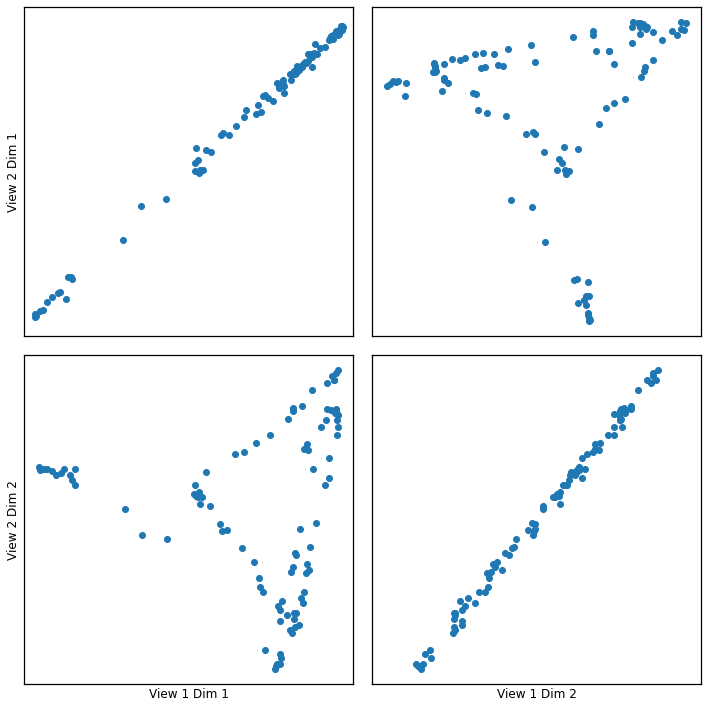

In [23]:
crossviews_plot(icd, ax_ticks=False, ax_labels=True, equal_axes=True)

In [24]:
kcca_g_full = KCCA(ktype ="gaussian", sigma = 1.0, n_components = 2, reg = 0.01)
full = kcca_g_full.fit_transform(Xsg)

In [25]:
#%%timeit
#full = kcca_g_full.fit_transform(Xsg)

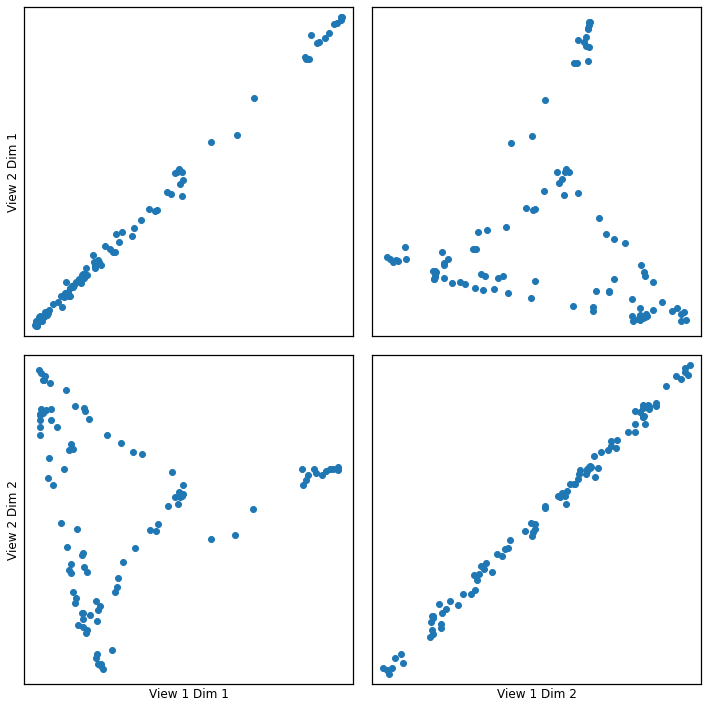

In [26]:
crossviews_plot(full, ax_ticks=False, ax_labels=True, equal_axes=True)

In [27]:
(fullr1, _) = stats.pearsonr(full[0][:,0], full[1][:,0])
(fullr2, _) = stats.pearsonr(full[0][:,1], full[1][:,1])

print("Below are the canonical correlation of the two components:")
print(fullr1,fullr2)

Below are the canonical correlation of the two components:
0.9984861053752105 0.9977420662609512
